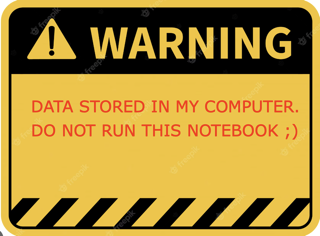

# Use Cases of the Recommendation

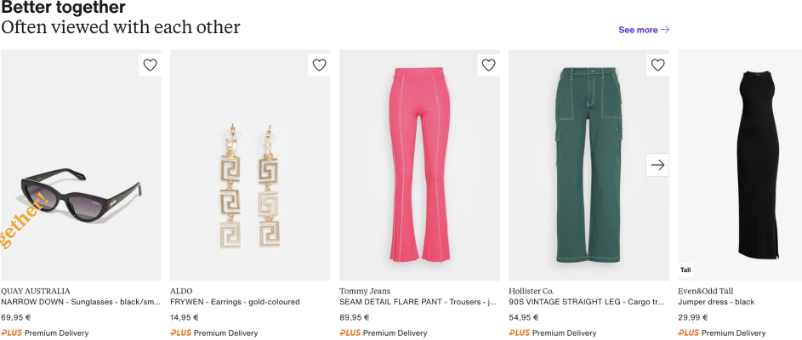

In [ ]:
from IPython.display import Image
Image(filename='/Users/yan/Desktop/final_project/Better together.png')

# 1. Import data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('trans_DF.csv')

##  - Only Use 2020 data

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df[df['date'].dt.year == 2020]
df = df.drop(columns=['sales_channel_id','price'])

# 2. Build Basic Code to Read Images (plt+os+cv2)

In [ ]:
# pip install opencv-python 

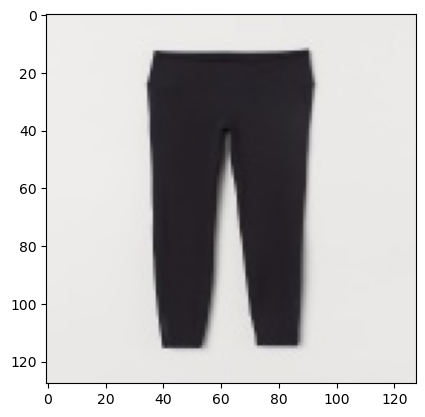

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2

# Check if file exists
path = '/Users/yan/Desktop/final_project/Image_128/073/0730683001.jpg'
if os.path.exists(path):
    # Load and display the image
    img = cv2.imread(path)[:,:,::-1]
    plt.imshow(img)
    plt.show()
else:
    print(f'File {path} not found.')


# 3. Pairng items to items

## Create a pair dictionary to store the top 3 products that customers boought together

In [ ]:
df.article_id.value_counts() 

706016001    16239
610776002    11386
751471001     9648
720125001     9366
706016002     8914
             ...  
562637001        1
813282003        1
764556001        1
710250003        1
876372001        1
Name: article_id, Length: 50090, dtype: int64

## - Solution 1 : Failed to run in whole set

In [ ]:
vc_visual = df.article_id.value_counts() #the number of times each article_id appears (AKA number of sales)

pairs_visual = {} #Hold the paired items for each article_id

# for j,i in enumerate(vc.index.values):#For visualization only 
for j,i in enumerate(vc_visual.index.values[1000:1030]): 
#     if j%10==0: print(j,', ',end='')
    
#     unique customer_id values for the current article_id
    USERS = df.loc[df.article_id==i.item(),'customer_id'].unique() 
    
#     #creates a series of counts of the number of times each article_id was sold to customers who also purchased the current article_id, 
#     #but did not purchase the current article_id. 
#     #This is done by selecting all rows where the customer_id is in USERS and the article_id is not equal to the current article_id.
    vc2_visual = df.loc[(df.customer_id.isin(USERS))&(df.article_id!=i.item()),'article_id'].value_counts()
    
#     #assigns the three most frequently sold items to the pairs dictionary for the current article_id.
    pairs_visual[i.item()] = [vc2_visual.index[0], vc2_visual.index[1], vc2_visual.index[2]]

## - Solution 2 : Skip irrelevant part in the loop

In [ ]:
vc = df.article_id.value_counts()
pairs = {}
for j,i in enumerate(vc.index.values):
    if j%10==0: print(j,', ',end='')
    USERS = df.loc[df.article_id==i.item(),'customer_id'].unique()
    vc2 = df.loc[(df.customer_id.isin(USERS))&\
                 (df.article_id!=i.item()),'article_id']
    if len(vc2)==0: continue #(1) if no other customers bought the item (2) if the customers who bought the item did not buy anything else.
    vc2 = vc2.value_counts()
    pairs[i.item()] = vc2.index[0]

0 , 10 , 20 , 30 , 40 , 50 , 60 , 70 , 80 , 90 , 100 , 110 , 120 , 130 , 140 , 150 , 160 , 170 , 180 , 190 , 200 , 210 , 220 , 230 , 240 , 250 , 260 , 270 , 280 , 290 , 300 , 310 , 320 , 330 , 340 , 350 , 360 , 370 , 380 , 390 , 400 , 410 , 420 , 430 , 440 , 450 , 460 , 470 , 480 , 490 , 500 , 510 , 520 , 530 , 540 , 550 , 560 , 570 , 580 , 590 , 600 , 610 , 620 , 630 , 640 , 650 , 660 , 670 , 680 , 690 , 700 , 710 , 720 , 730 , 740 , 750 , 760 , 770 , 780 , 790 , 800 , 810 , 820 , 830 , 840 , 850 , 860 , 870 , 880 , 890 , 900 , 910 , 920 , 930 , 940 , 950 , 960 , 970 , 980 , 990 , 1000 , 1010 , 1020 , 1030 , 1040 , 1050 , 1060 , 1070 , 1080 , 1090 , 1100 , 1110 , 1120 , 1130 , 1140 , 1150 , 1160 , 1170 , 1180 , 1190 , 1200 , 1210 , 1220 , 1230 , 1240 , 1250 , 1260 , 1270 , 1280 , 1290 , 1300 , 1310 , 1320 , 1330 , 1340 , 1350 , 1360 , 1370 , 1380 , 1390 , 1400 , 1410 , 1420 , 1430 , 1440 , 1450 , 1460 , 1470 , 1480 , 1490 , 1500 , 1510 , 1520 , 1530 , 1540 , 1550 , 1560 , 1570 , 1580 

# 4. Sense check - Visualize the pairing results

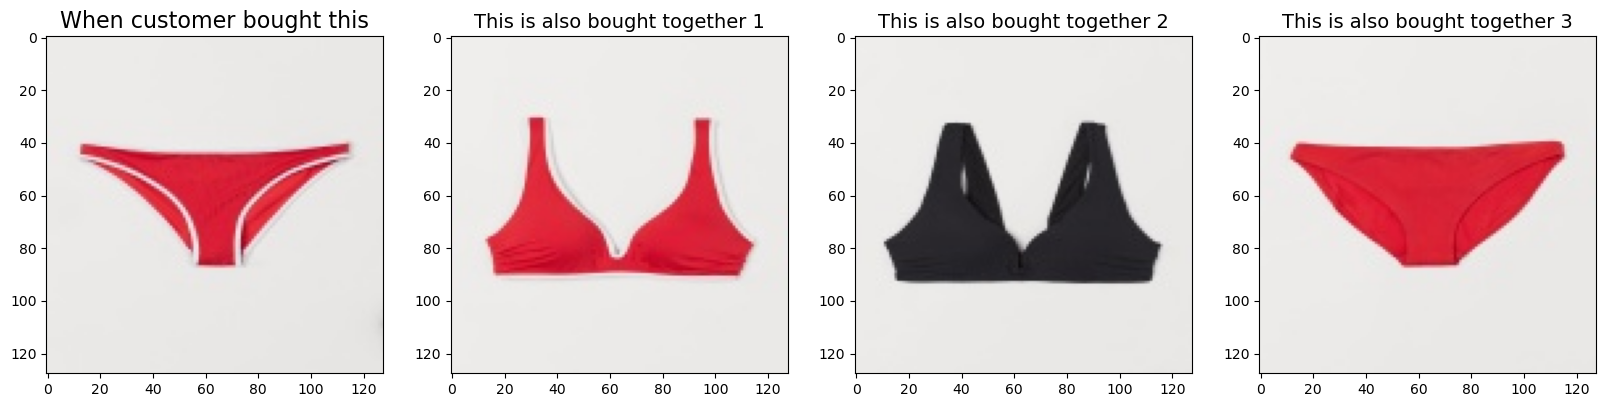

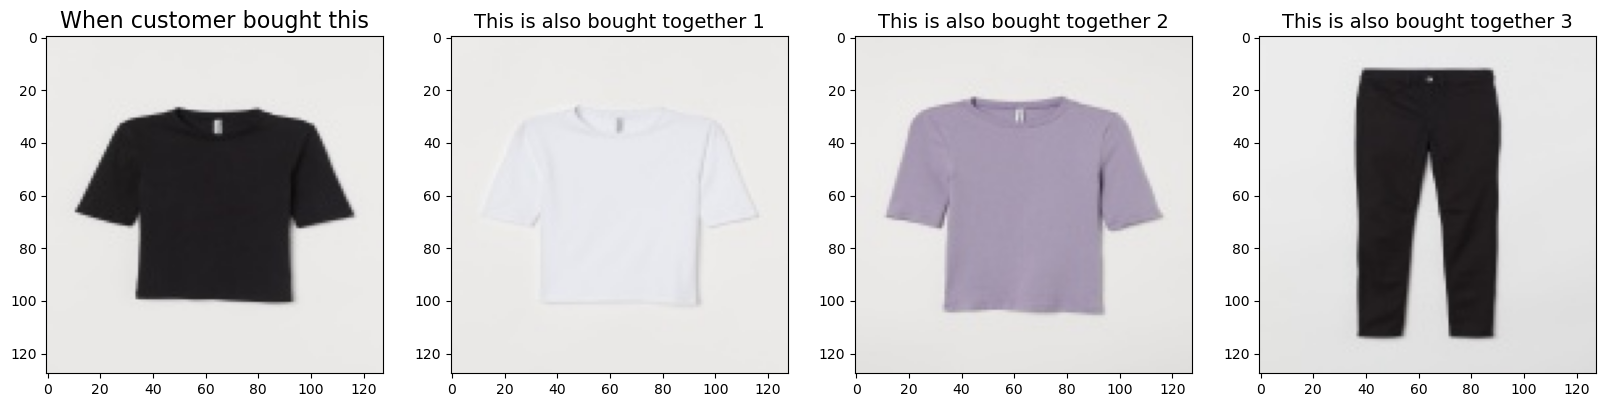

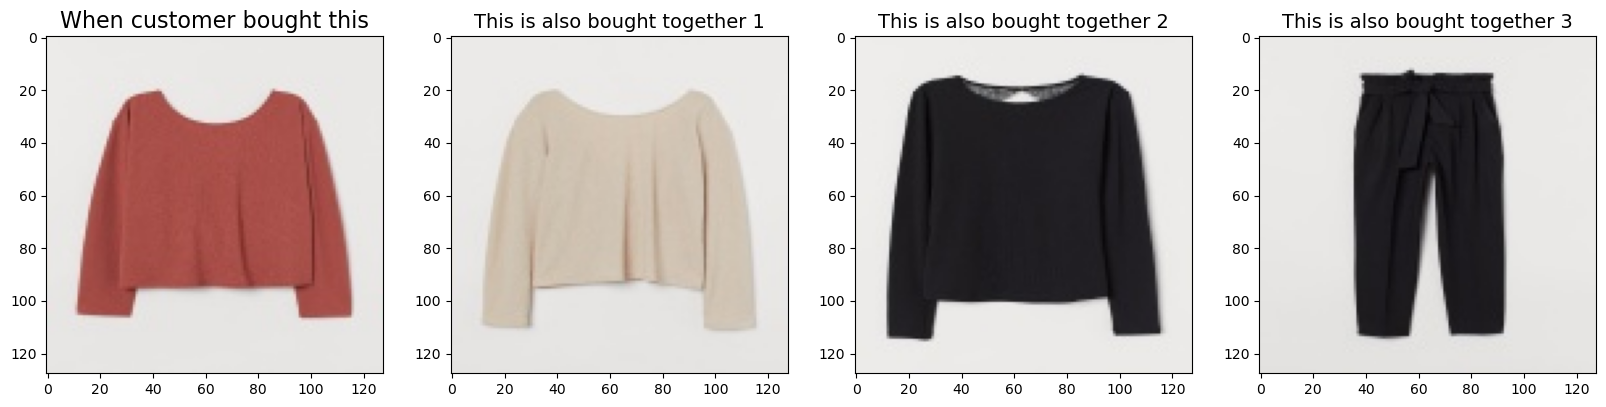

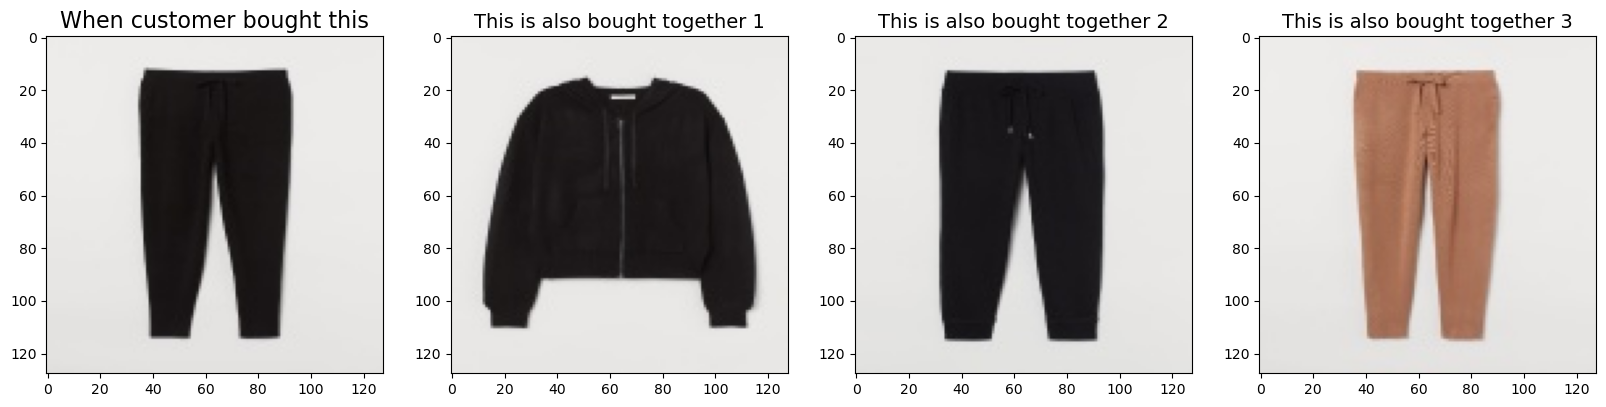

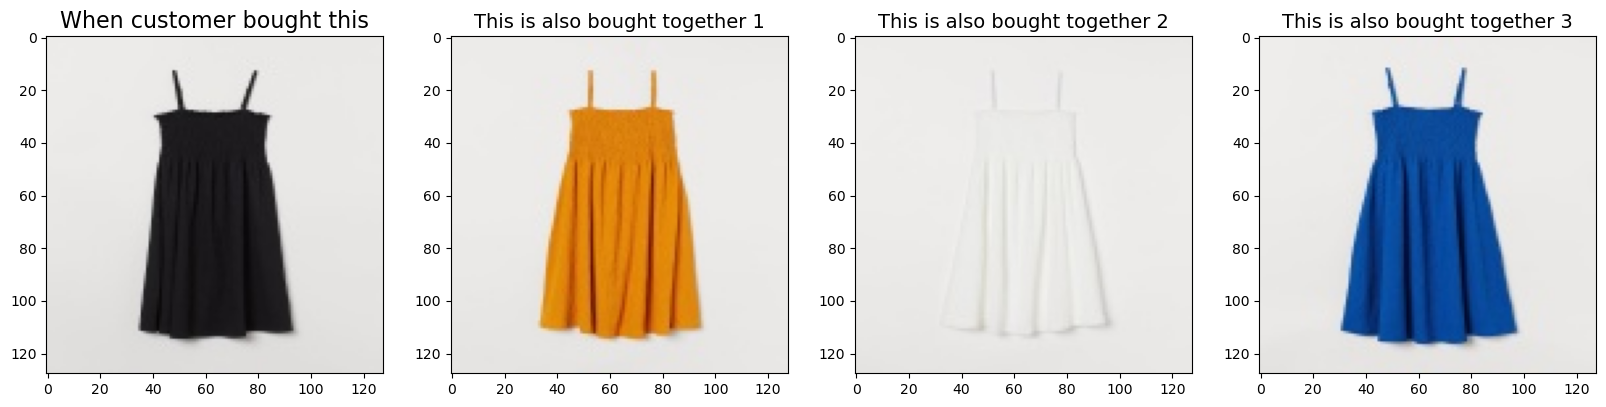

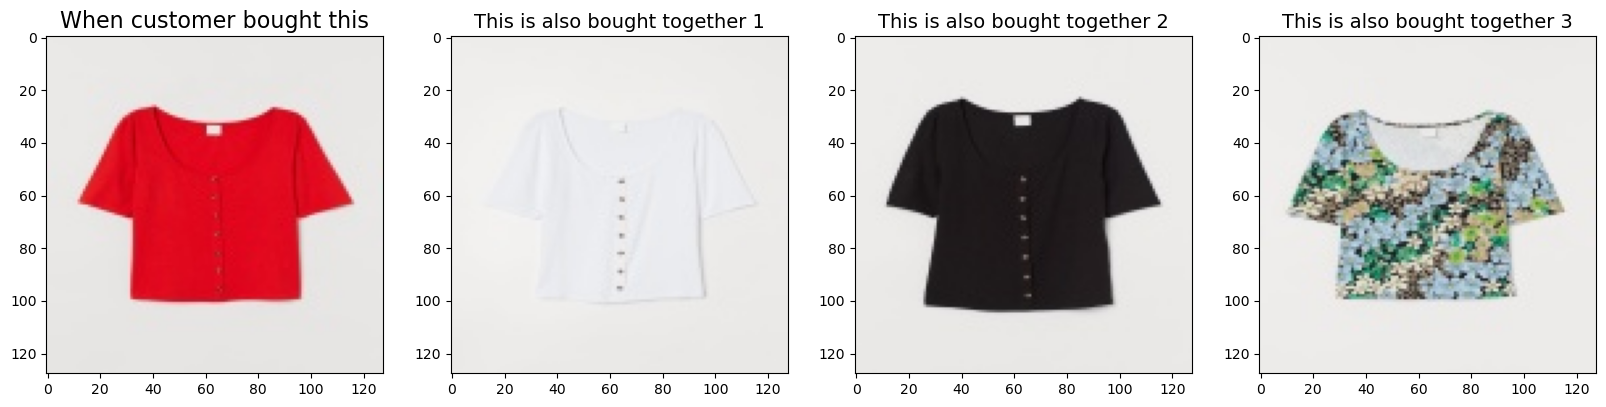

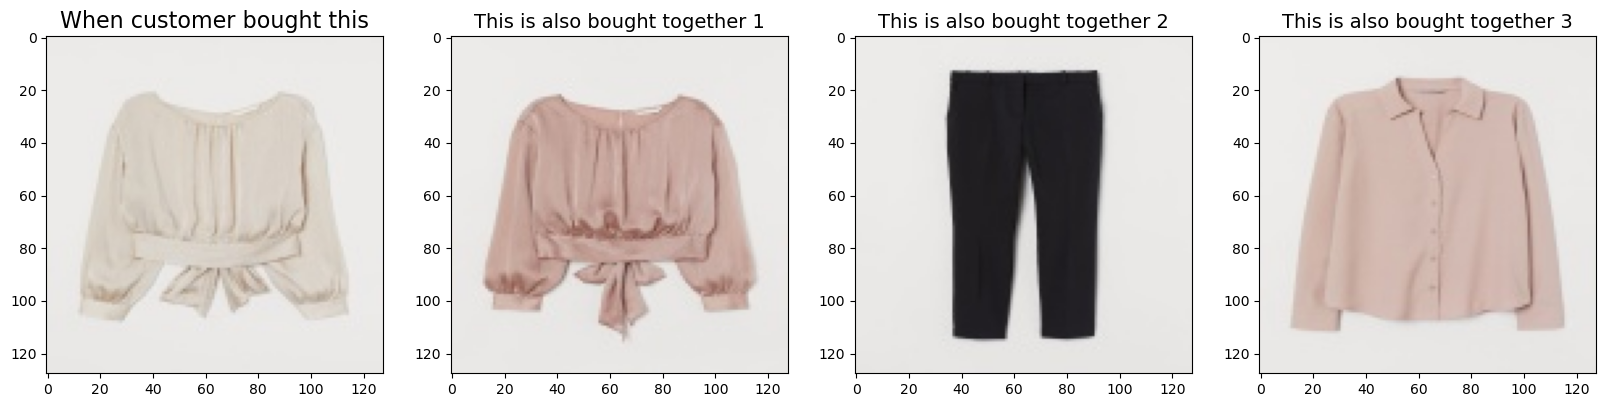

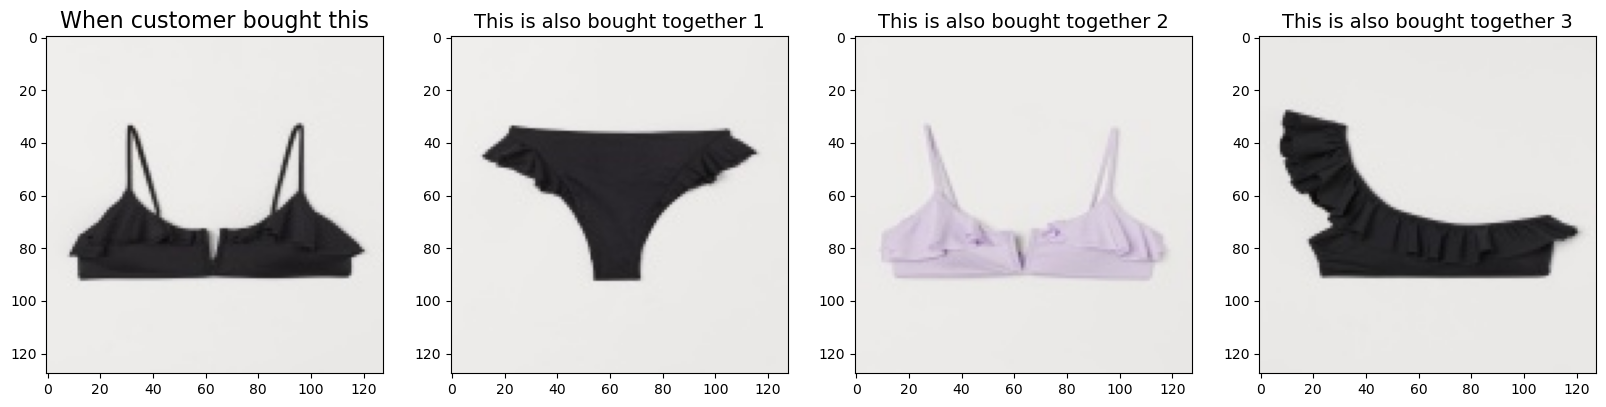

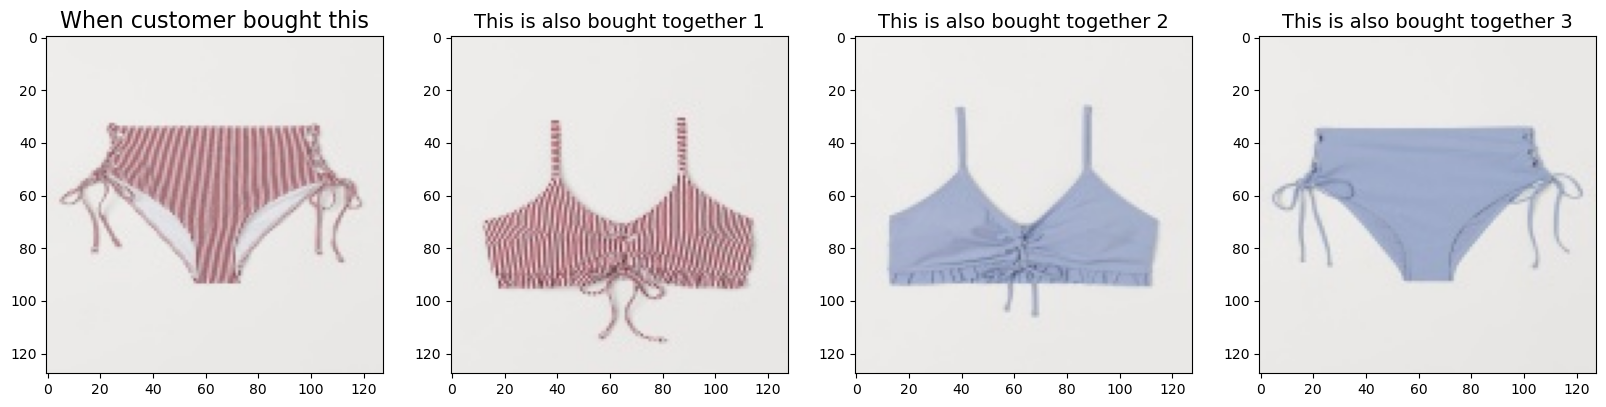

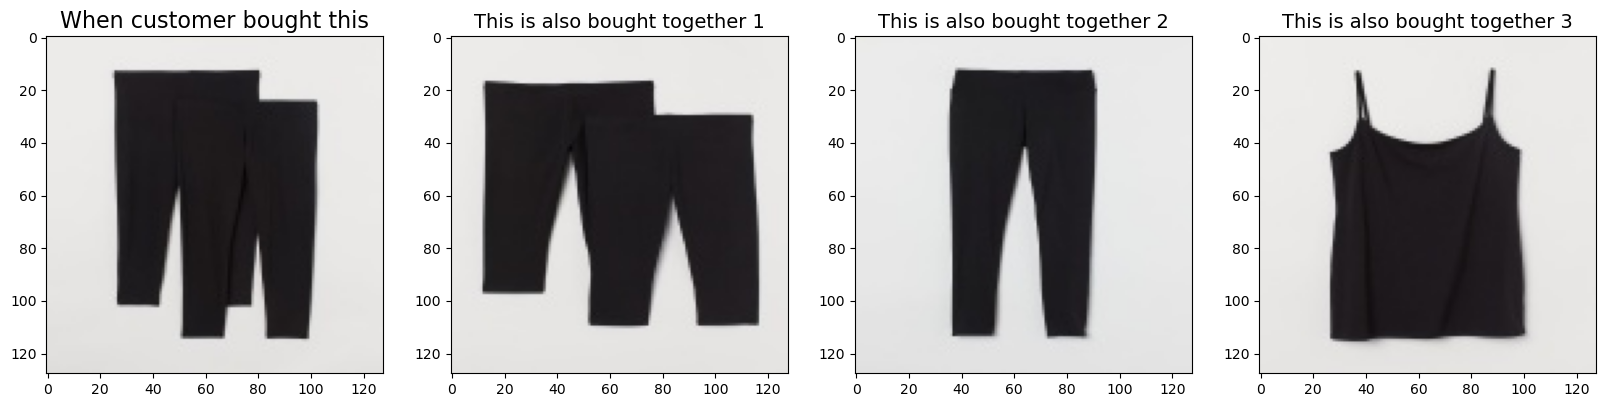

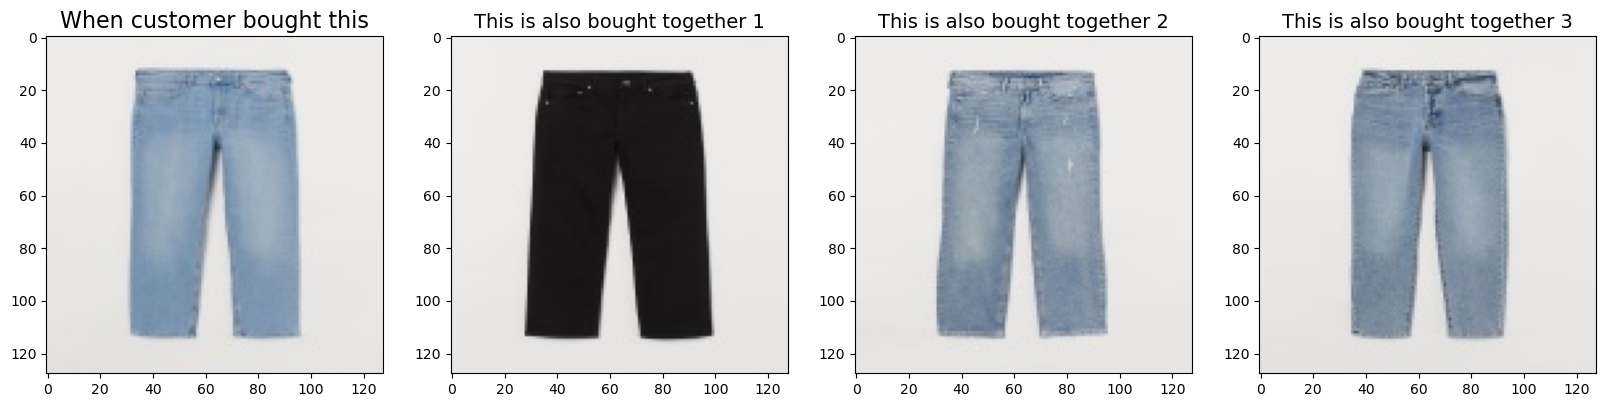

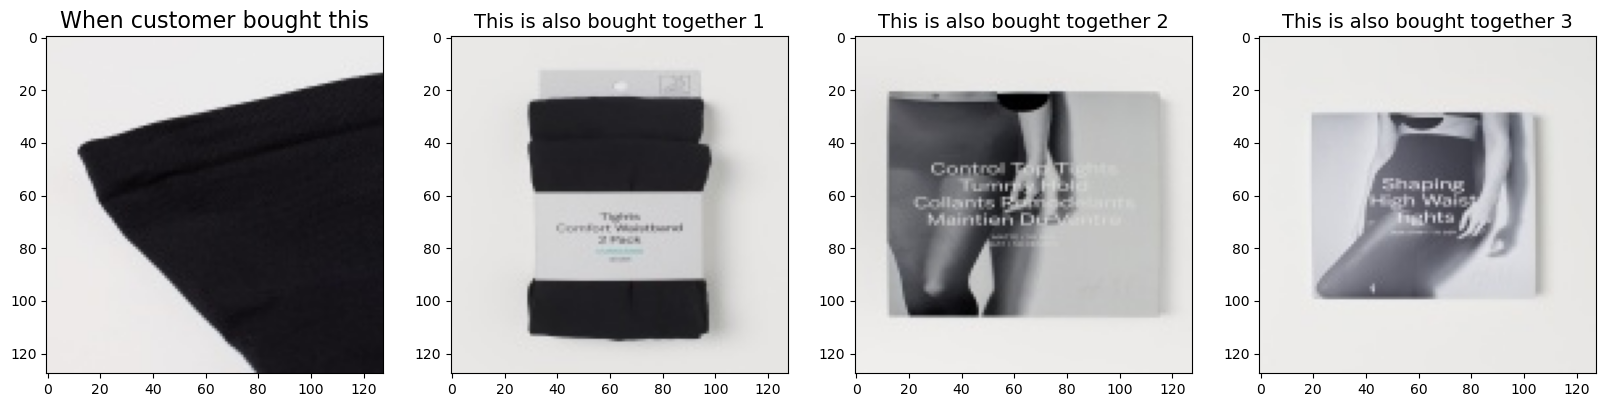

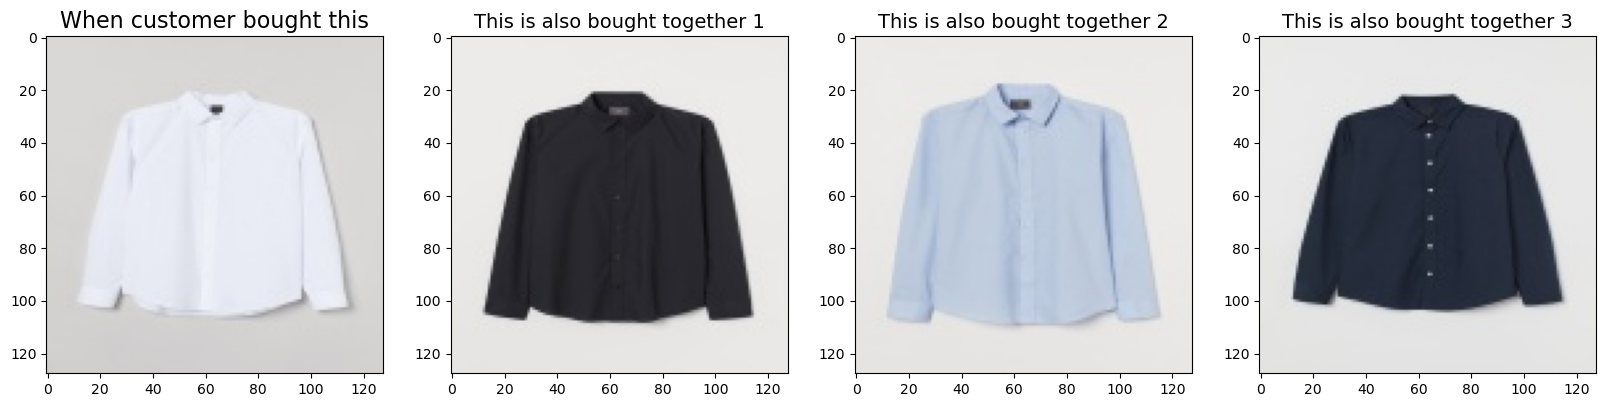

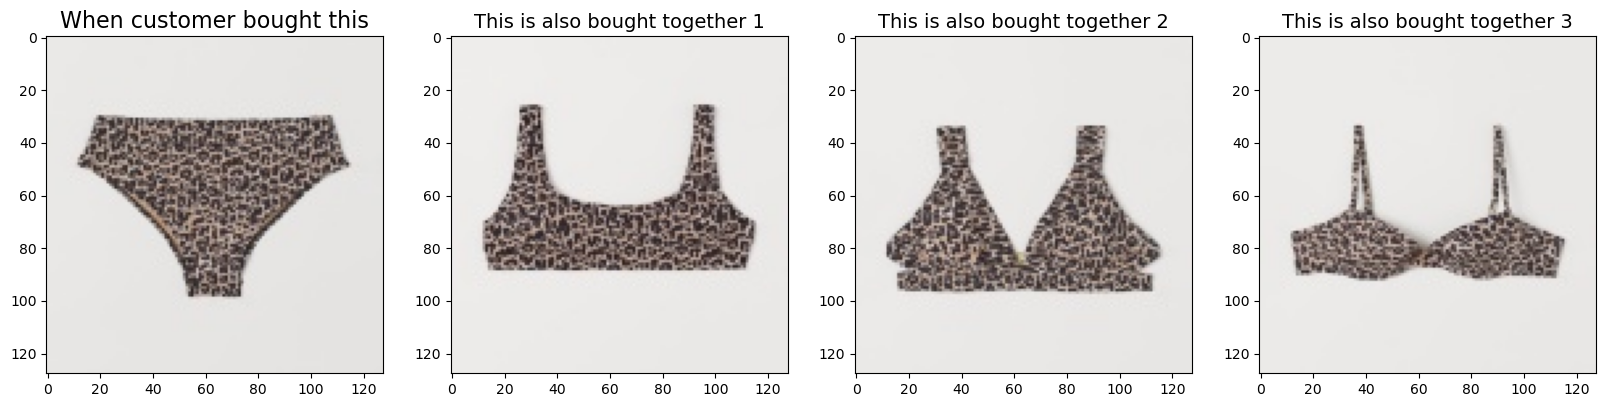

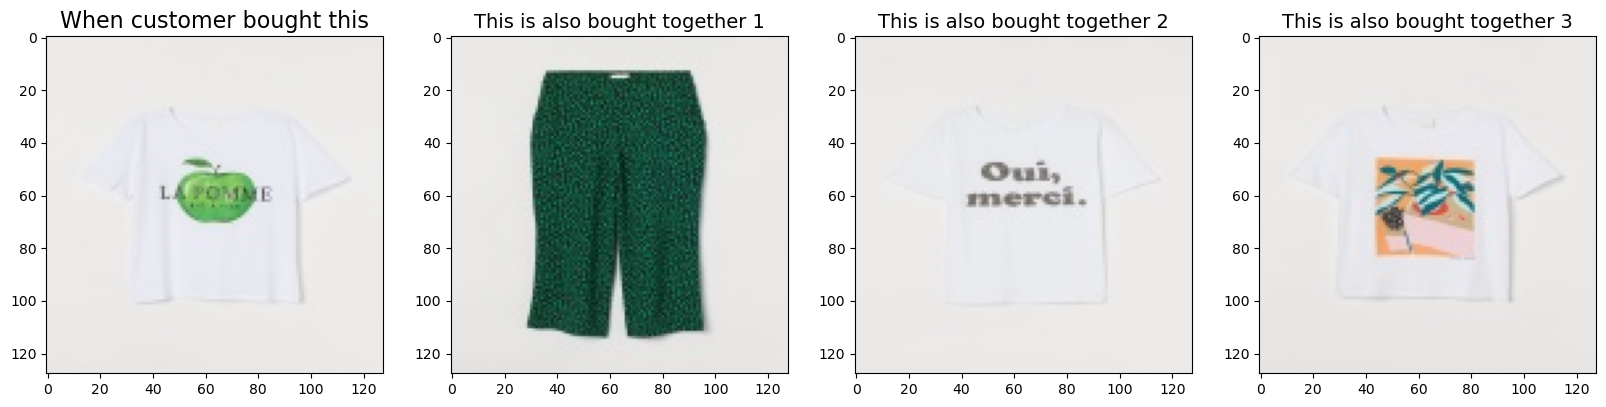

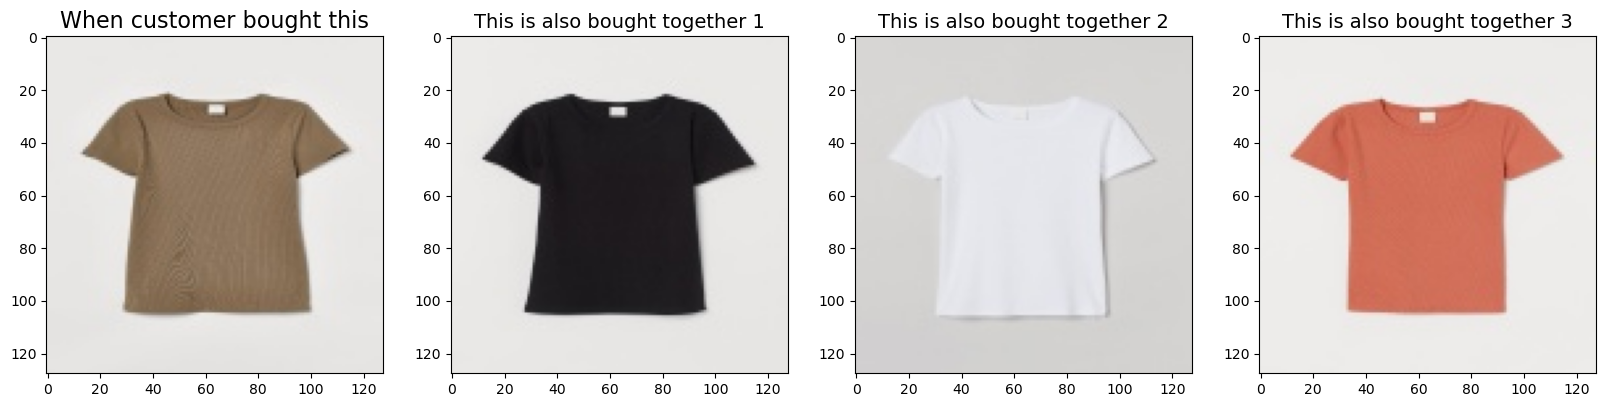

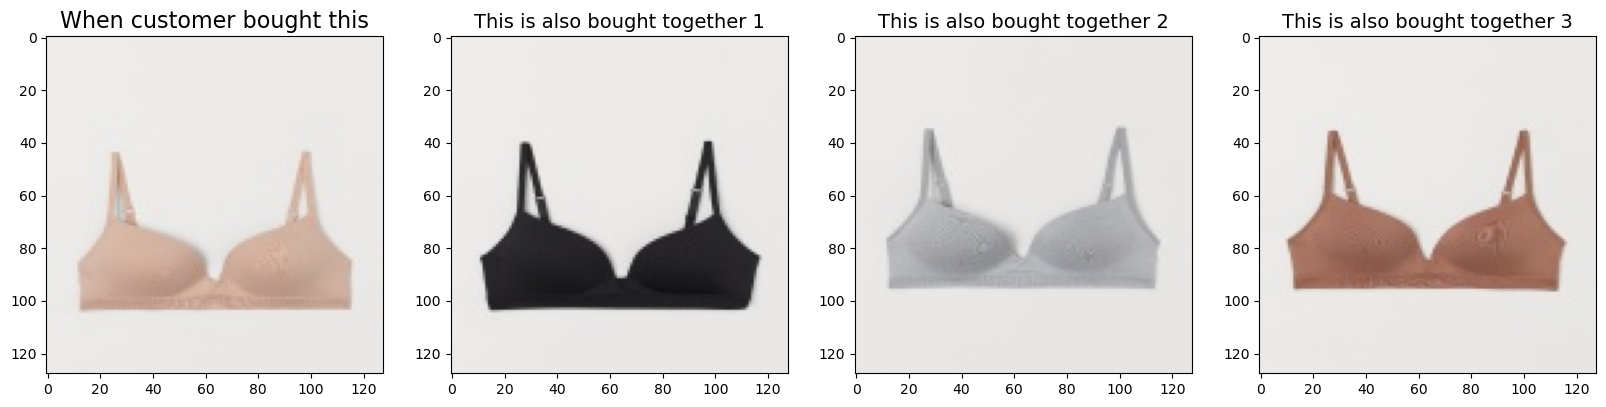

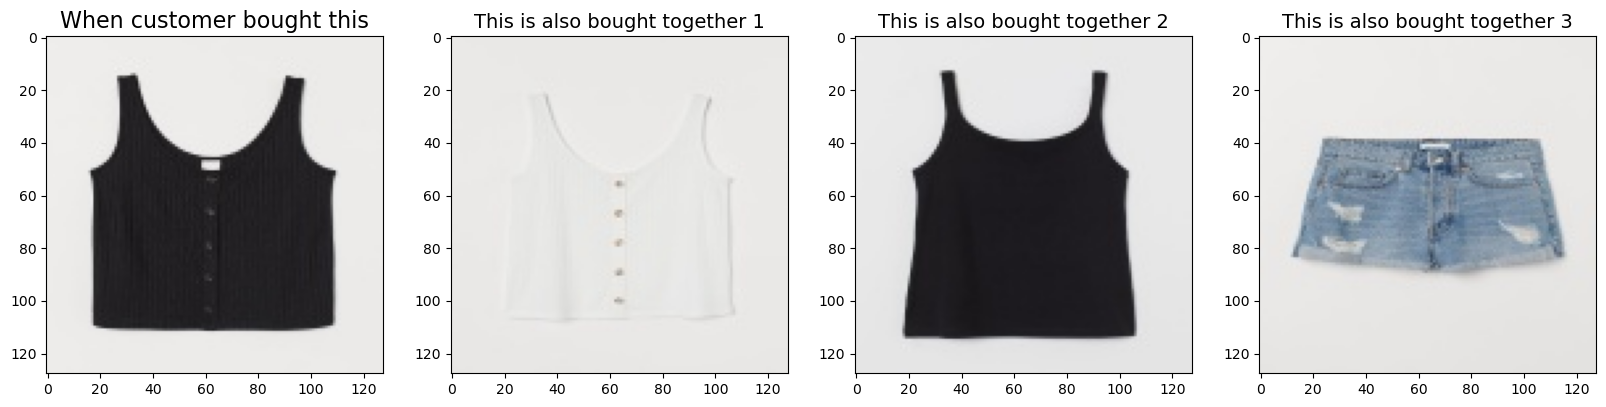

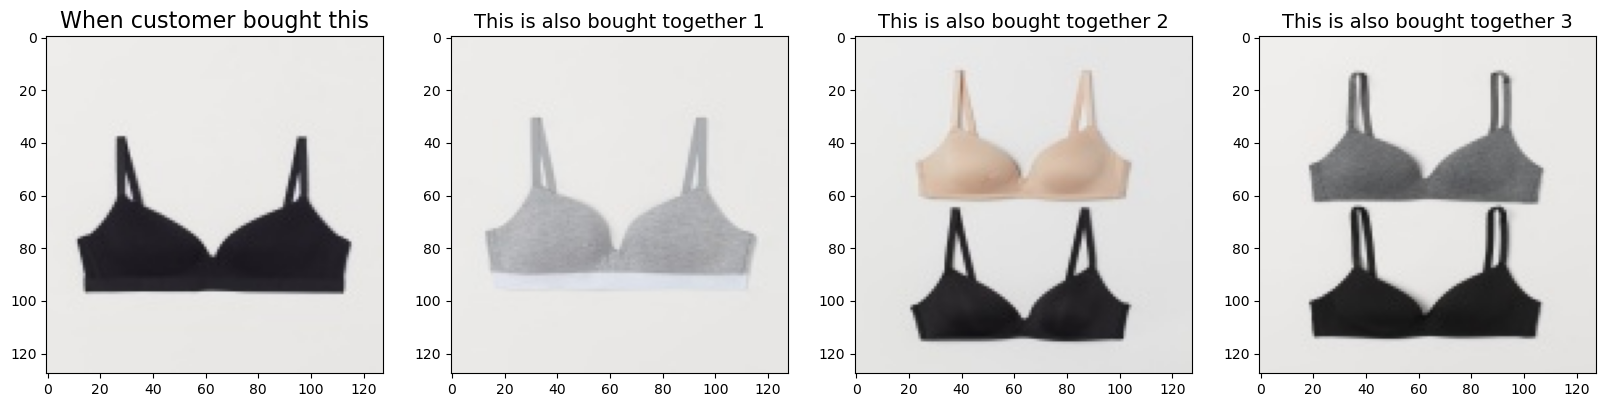

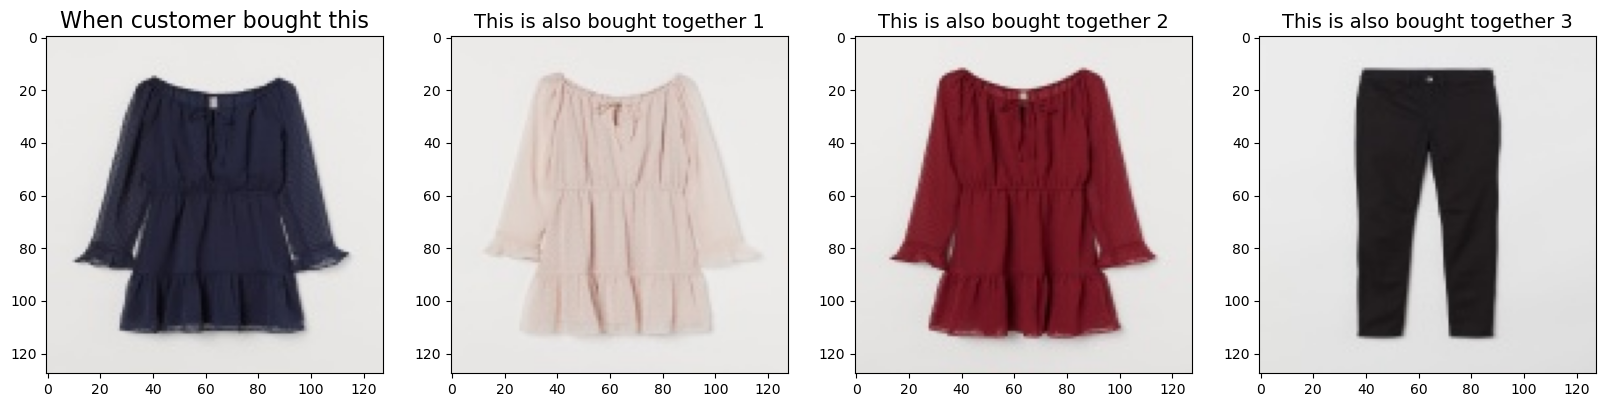

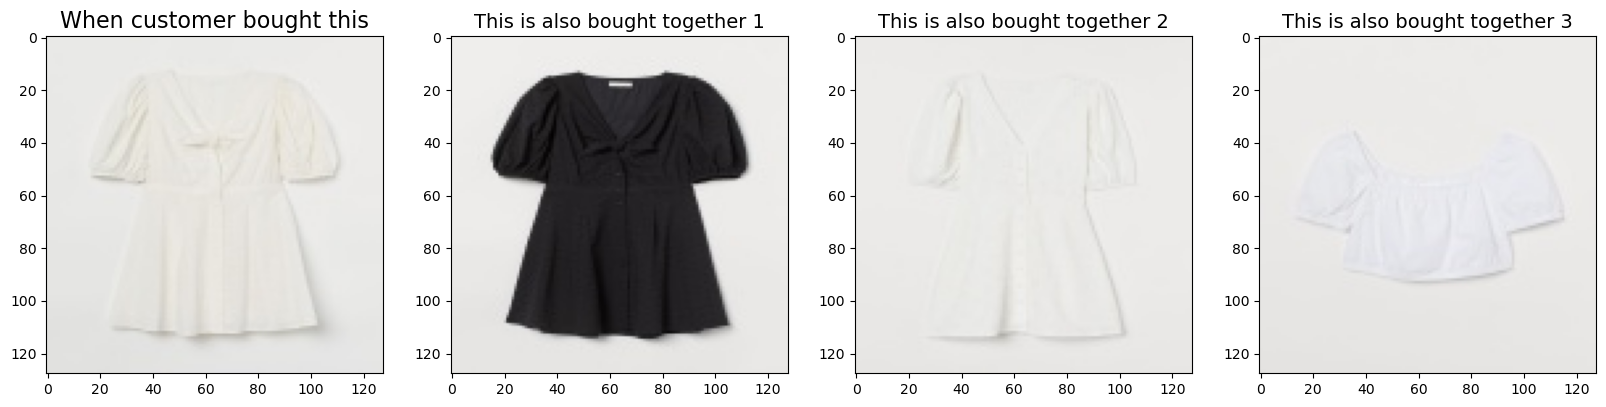

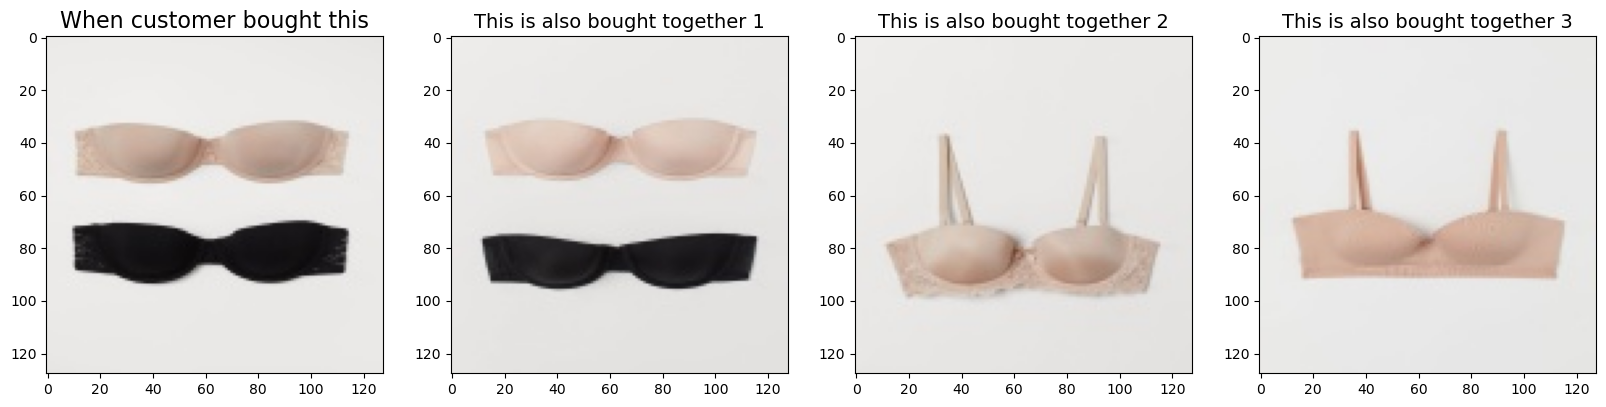

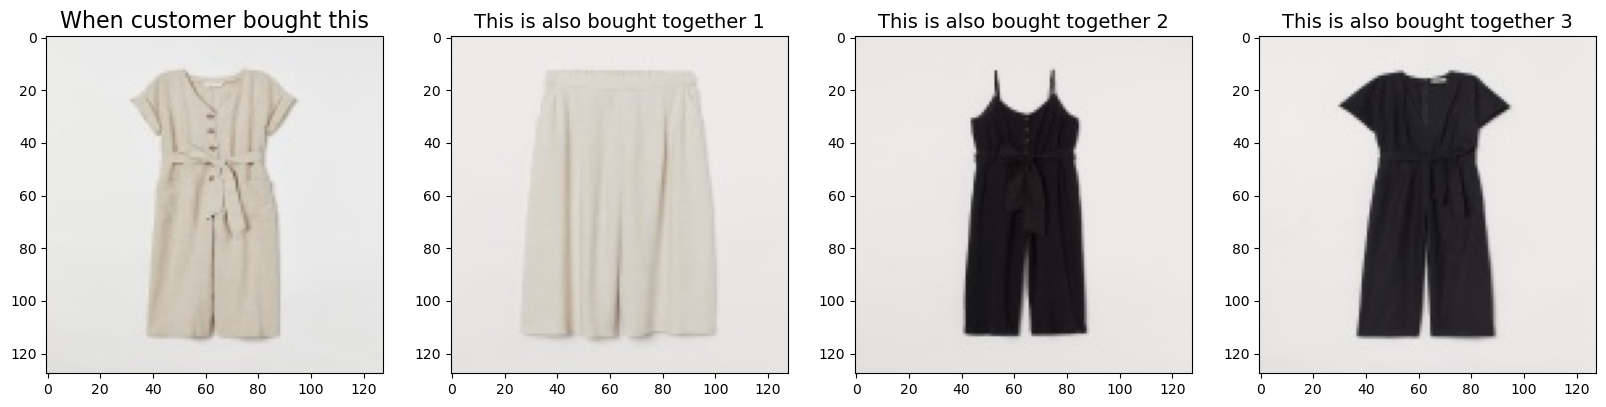

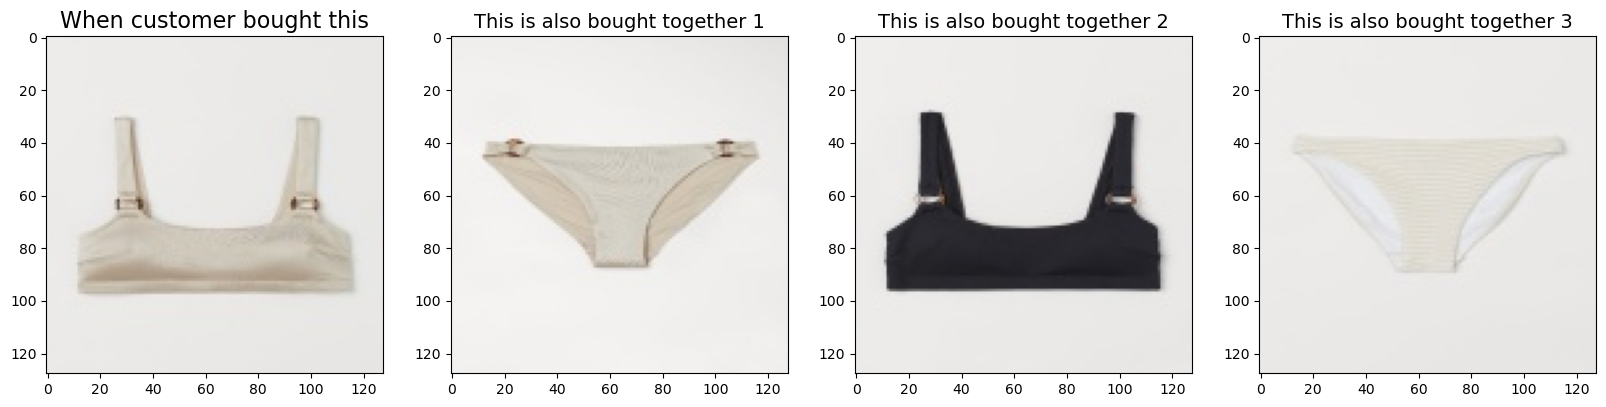

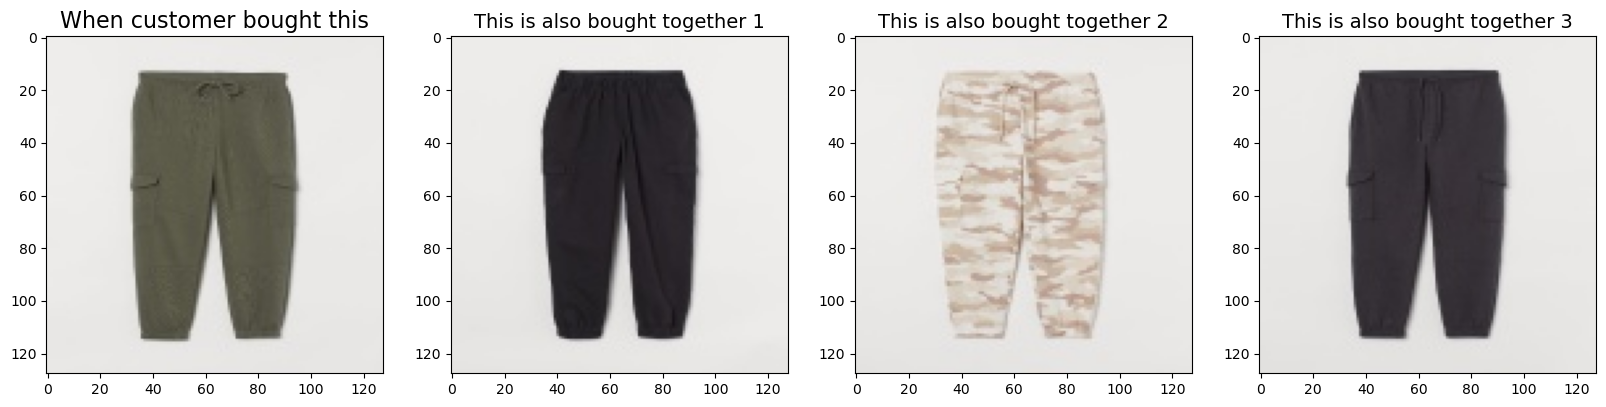

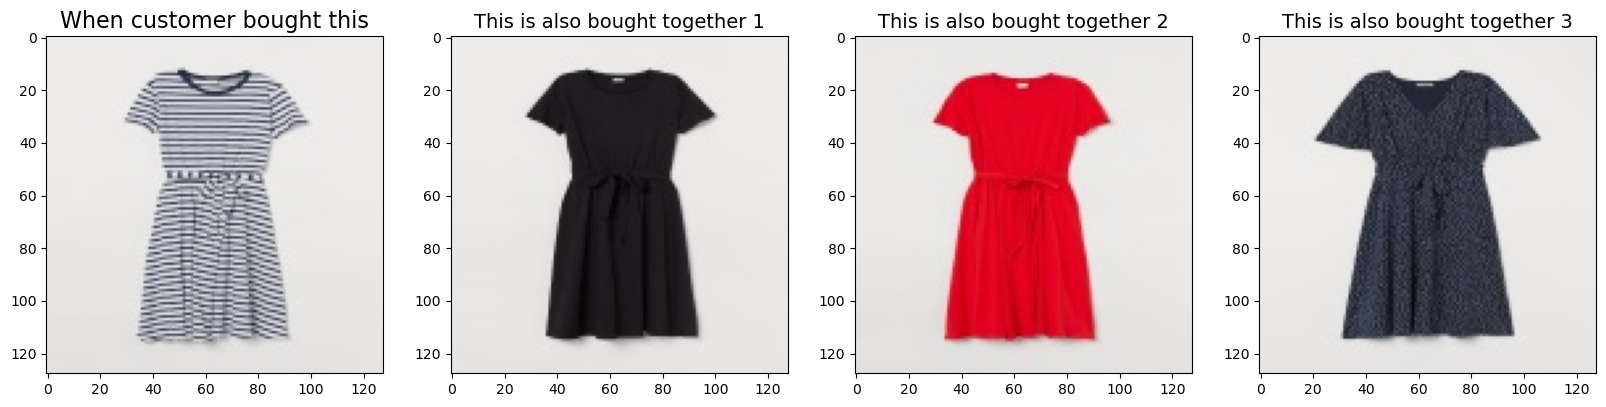

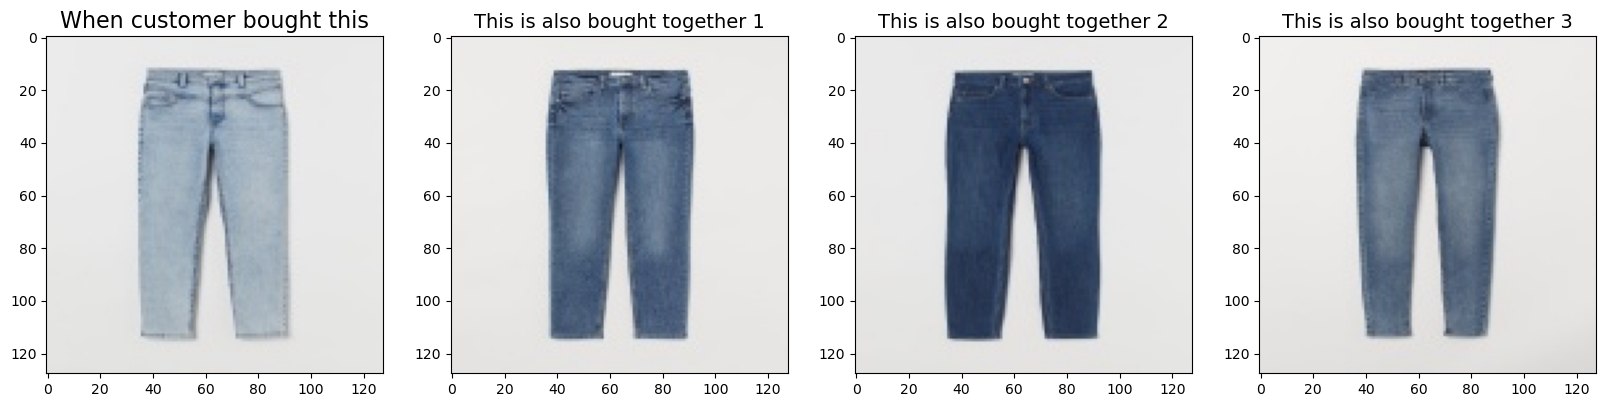

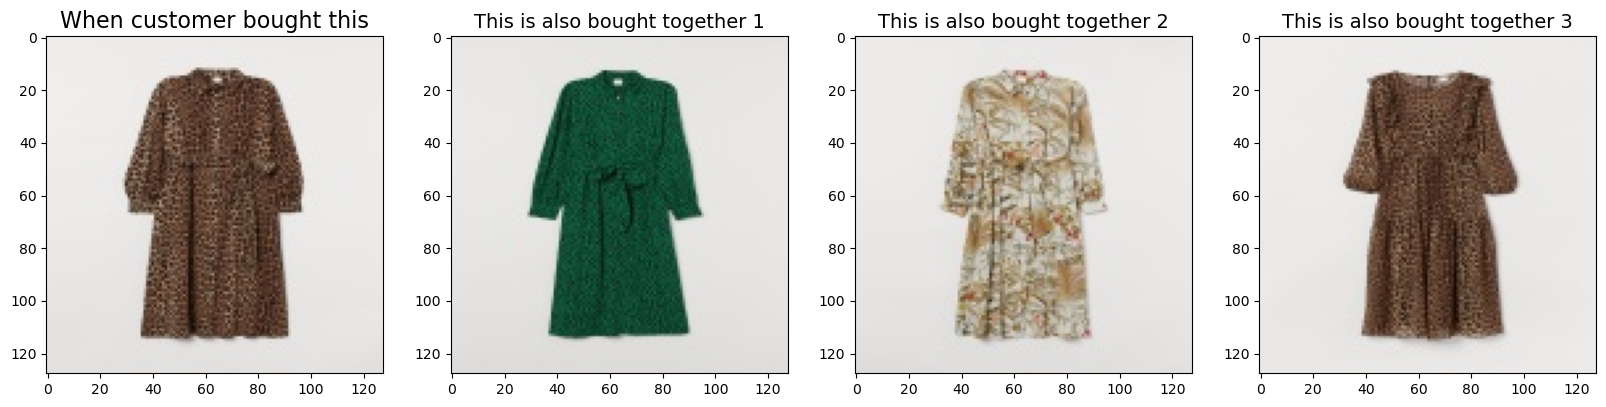

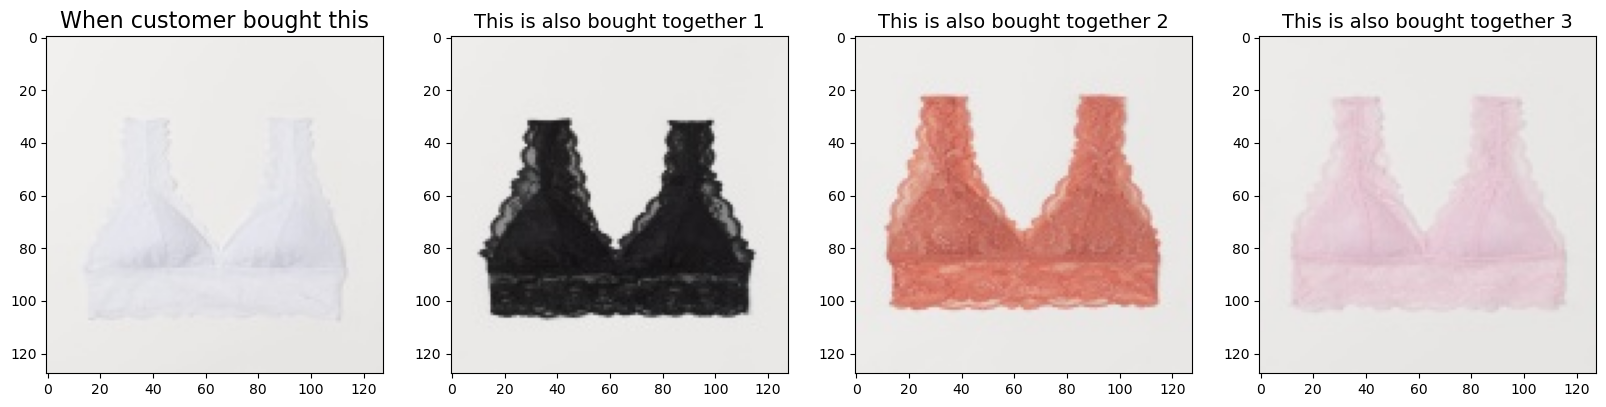

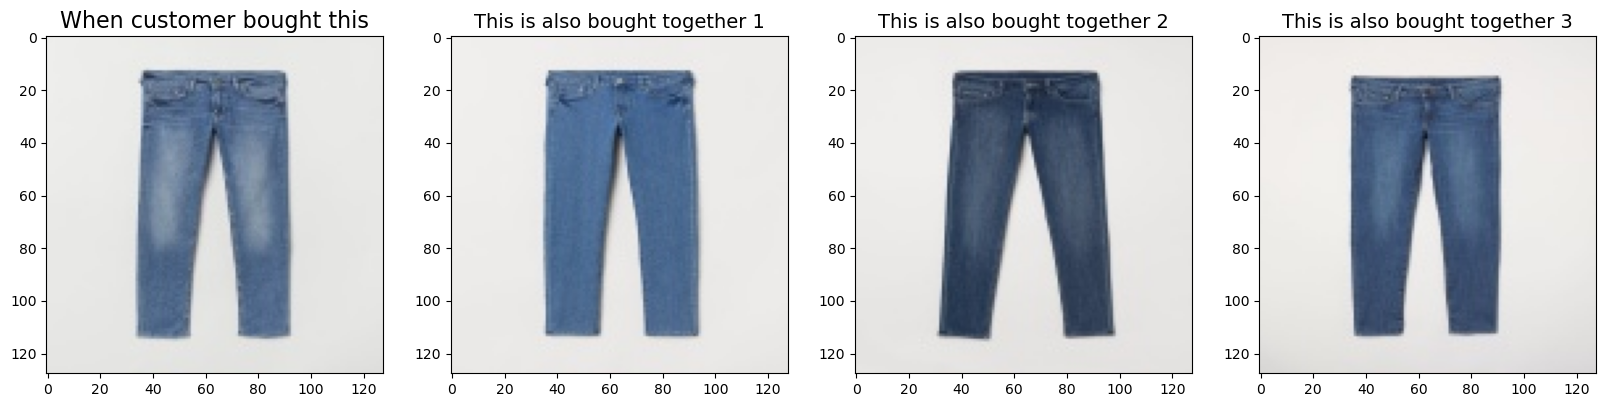

In [ ]:
from os.path import exists #The exists function is part of the os.path module in Python. It is used to check whether a file or directory exists at a given path.
import matplotlib.pyplot as plt
import cv2, matplotlib.pyplot as plt

items = pd.read_csv('articles.csv')
BASE = '/Users/yan/Desktop/final_project/Image_128/'

for i,(k,v) in enumerate( pairs_visual.items() ):
    name1 = BASE+'0'+str(k)[:2]+'/0'+str(k)+'.jpg'
    name2 = BASE+'0'+str(v[0])[:2]+'/0'+str(v[0])+'.jpg'
    name3 = BASE+'0'+str(v[1])[:2]+'/0'+str(v[1])+'.jpg'
    name4 = BASE+'0'+str(v[2])[:2]+'/0'+str(v[2])+'.jpg'
    
    if exists(name1) & exists(name2) & exists(name3) & exists(name4):
        plt.figure(figsize=(20,5))
        
        img1 = cv2.imread(name1)[:,:,::-1]
        img2 = cv2.imread(name2)[:,:,::-1]
        img3 = cv2.imread(name3)[:,:,::-1]
        img4 = cv2.imread(name4)[:,:,::-1]
        
        plt.subplot(1,4,1)
        plt.title('When customer bought this',size=16)
        plt.imshow(img1)
        plt.subplot(1,4,2)
        plt.title('This is also bought together 1',size=14)
        plt.imshow(img2)
        plt.subplot(1,4,3)
        plt.title('This is also bought together 2',size=14)
        plt.imshow(img3)
        plt.subplot(1,4,4)
        plt.title('This is also bought together 3',size=14)
        plt.imshow(img4)
        plt.show()


# 5. Export pair result

In [ ]:
import numpy as np
np.save('pairs',pairs)